# Logistic Regression

In [11]:
try:
    import google.colab
    %pip install numpy pandas matplotlib scikit-learn seaborn
except ImportError:
    pass


In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import seaborn as sns

## South African Heart Disease

In [347]:
data_path = 'SAheart.data'

if os.path.exists(data_path):
    os.remove(data_path)
!wget https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data

data = pd.read_csv(data_path)
data = data.drop('row.names', axis=1)
data['famhist'] = data['famhist'].map({'Absent': 0, 'Present': 1})
data = data.sample(frac=1, random_state=2).reset_index(drop=True)

display(data.describe().round(2))
data.info()
data.head()

--2024-10-13 18:33:54--  https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data
Resolving hastie.su.domains (hastie.su.domains)... 159.89.149.97
Connecting to hastie.su.domains (hastie.su.domains)|159.89.149.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25106 (25K)
Saving to: ‘SAheart.data’

SAheart.data        100%[===================>]  24.52K  --.-KB/s    in 0.07s   

2024-10-13 18:33:55 (364 KB/s) - ‘SAheart.data’ saved [25106/25106]



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00
mean,138.33,3.64,4.74,25.41,0.42,53.10,26.04,17.04,42.82,0.35
std,20.50,4.59,2.07,7.78,0.49,9.82,4.21,24.48,14.61,0.48
min,101.00,0.00,0.98,6.74,0.00,13.00,14.70,0.00,15.00,0.00
25%,124.00,0.05,3.28,19.77,0.00,47.00,22.98,0.51,31.00,0.00
50%,134.00,2.00,4.34,26.12,0.00,53.00,25.80,7.51,45.00,0.00
75%,148.00,5.50,5.79,31.23,1.00,60.00,28.50,23.89,55.00,1.00
max,218.00,31.20,15.33,42.49,1.00,78.00,46.58,147.19,64.00,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,124,3.04,4.80,19.52,1,60,21.78,147.19,41,1
1,136,7.36,2.19,28.11,1,61,25.00,61.71,54,0
2,124,0.81,6.16,11.61,0,35,21.47,10.49,26,0
3,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
4,162,7.00,7.67,34.34,1,33,30.77,0.00,62,0


In [348]:
# Split the data into features and target
X = data.drop('chd', axis=1)
y = data['chd']
features = X.columns
features

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age'],
      dtype='object')

In [349]:
# Create a pairplot for the dataset
sns.pairplot(data, hue='chd')
plt.show()

In [350]:
# Split the data into train (80%), validation (10%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Standardize the feature
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

X_train_s, y_train.values

(array([[ 0.45665503,  0.55467785,  0.80699479, ..., -0.31384656,
         -0.71012832,  0.85186506],
        [-0.23152463, -0.13064463, -0.74988333, ...,  0.07951009,
         -0.09094221, -1.05074406],
        [-0.03490187, -0.29740643,  0.76947965, ...,  0.98635027,
         -0.59014054, -0.71099243],
        ...,
        [-0.72308153, -0.77941657, -1.09220894, ..., -0.3421117 ,
          2.35754572, -1.32254536],
        [ 0.45665503,  0.10693383, -0.36535319, ...,  0.41162558,
         -0.63846326, -0.98279373],
        [-1.01801567,  0.0977962 , -0.38411076, ..., -0.20785225,
         -0.36900264,  0.4441631 ]]),
 array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
   

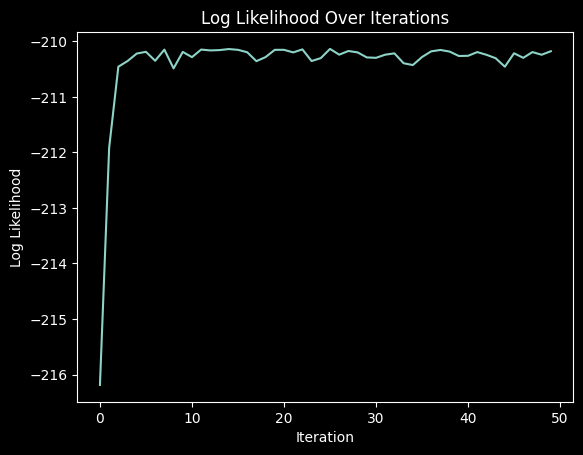

In [351]:
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, C=0.01, num_steps=None, regularization=None, approach='vectorized'):
        self.learning_rate = learning_rate  # Step size for updating weights
        self.C = C  # Regularization strength (L1 or L2 penalty factor)
        self.num_steps = num_steps
        self.regularization = regularization  # 'l1', 'l2', or None
        self.approach = approach  # 'vectorized' or 'stochastic'
        self.weights = None
        self.log_likelihood_values = []

    def sigmoid(self, z):
        # S(z) = 1 / (1 + exp(-z))
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.weights))

    def compute_log_likelihood(self, X, y):
        # log_likelihood = sum(y * log(predictions) + (1 - y) * log(1 - predictions))
        predictions = self.predict(X)
        return np.sum(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9)) # 1e-9 is added to prevent log(0)

    def fit(self, X, y):
        # Initialize weights with zeros
        self.weights = np.zeros(X.shape[1])
        
        for step in range(self.num_steps):
            X, y = shuffle(X, y, random_state=step)
            
            if self.approach == 'vectorized':
                # Vectorized computation for all samples in the dataset
                predictions = self.predict(X)
                errors = y - predictions
                gradient = np.dot(X.T, errors) / X.shape[0]
                
                # Update weights using the gradient and learning rate
                self.weights += self.learning_rate * gradient
            elif self.approach == 'stochastic':
                # Stochastic gradient descent: iterate through each sample
                for i in range(X.shape[0]):
                    prediction = self.predict(X[i])
                    error = y[i] - prediction
                    gradient = X[i] * error
                    
                    # Update weights using the gradient and learning rate
                    self.weights += self.learning_rate * gradient
            
            # Apply Regularization Penalty if regularization is enabled
            if self.regularization == 'l1':
                # L1 Regularization
                self.weights = np.sign(self.weights) * np.maximum(0, np.abs(self.weights) - self.learning_rate * self.C)
            elif self.regularization == 'l2':
                # L2 Regularization
                self.weights -= self.learning_rate * self.C * self.weights
            
            log_likelihood = self.compute_log_likelihood(X, y)
            self.log_likelihood_values.append(log_likelihood)

    def plot_log_likelihood(self):
        # Plot the log likelihood values over iterations to visualize convergence
        plt.plot(range(len(self.log_likelihood_values)), self.log_likelihood_values)
        plt.xlabel('Iteration')
        plt.ylabel('Log Likelihood')
        plt.title('Log Likelihood Over Iterations')
        plt.show()

learning_rate = 0.01
C = 0.1
num_steps = 50
approach = 'stochastic'

# Train logistic regression using SGD without regularization
model_no_reg = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization=None, approach=approach)
model_no_reg.fit(X_train_s, y_train.values)
model_no_reg.plot_log_likelihood()

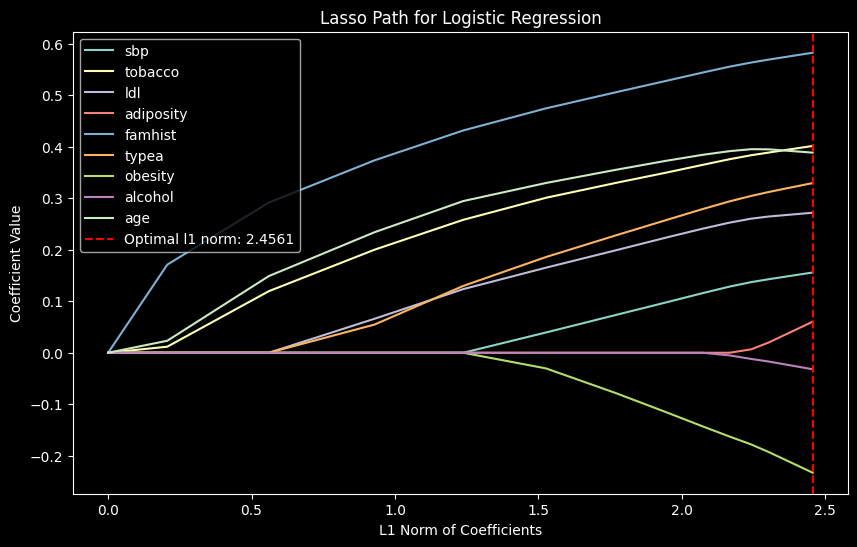

Selected Features using Lasso: Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age'],
      dtype='object')
Best C value: 0.0001


In [352]:
def lasso(X_train_s, y_train, X_val_s, y_val, columns, learning_rate, num_steps, approach='stochastic'):
    # Define the range of C values (regularization strength)
    C_values = np.logspace(-4, 4, 50)
    coefs = []
    accuracies = []

    # Fit L1-regularized logistic regression models for different values of C
    for C in C_values:
        model = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization='l1', approach=approach)
        model.fit(X_train_s, y_train)
        coefs.append(model.weights.flatten())

        y_val_pred = model.predict(X_val_s) >= 0.5
        accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(accuracy)

    # Plot the Lasso path
    coefs = np.array(coefs)
    l1_norms = np.sum(np.abs(coefs), axis=1)
    best_l1_norm = l1_norms[np.argmax(accuracies)]
    
    plt.figure(figsize=(10, 6))
    for i in range(coefs.shape[1]):
        plt.plot(l1_norms, coefs[:, i], label=columns[i])
    plt.axvline(x=best_l1_norm, color='red', linestyle='--', label=f'Optimal l1 norm: {best_l1_norm:.4f}')
    plt.xlabel('L1 Norm of Coefficients')
    plt.ylabel('Coefficient Value')
    plt.title('Lasso Path for Logistic Regression')
    plt.legend()
    plt.show()

    # Select optimal C based on validation accuracy
    best_C = C_values[np.argmax(accuracies)]

    selected_features = columns[np.abs(coefs[np.argmax(accuracies)]) > 0]
    return selected_features, best_C

selected_features_lasso, best_C = lasso(X_train_s, y_train.values, X_val_s, y_val.values, features, learning_rate, num_steps, approach)
print('Selected Features using Lasso:', selected_features_lasso)
print('Best C value:', best_C)

In [353]:
# Manual Forward Stepwise Feature Selection using Cross-Validation with LogisticRegressionSGD
def forward_stepwise_selection(X_train, y_train, X_val, y_val, features, model):
    best_score = 0
    selected_features = []
    available_features = list(features)

    while available_features:
        best_feature = None
        for feature in available_features:
            current_features = selected_features + [feature]
            X_train_subset = pd.DataFrame(X_train, columns=features)[current_features].values
            X_val_subset = pd.DataFrame(X_val, columns=features)[current_features].values
            
            model.fit(X_train_subset, y_train.values)
            predictions = model.predict(X_val_subset) >= 0.5
            score = accuracy_score(y_val, predictions)
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature is not None:
            selected_features.append(best_feature)
            available_features.remove(best_feature)
        else:
            break
    return selected_features

model = LogisticRegressionSGD(learning_rate=0.01, C=0.01, num_steps=100, regularization=None, approach='stochastic')
selected_features_stepwise = forward_stepwise_selection(X_train_s, y_train, X_val_s, y_val, features, model)

print("Selected Features using forward_stepwise_selection: ", selected_features_stepwise)

Selected Features using forward_stepwise_selection:  ['age', 'tobacco', 'ldl']


In [354]:
accuracies = {}

# Train logistic regression using SGD without regularization
model_no_reg = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization=None, approach=approach)
model_no_reg.fit(X_train_s, y_train.values)
y_pred_no_reg = model_no_reg.predict(X_test_s) >= 0.5
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)
accuracies["No Regularization Model"] = accuracy_no_reg

# Train logistic regression using SGD with optimal L1 regularization
model_l1 = LogisticRegressionSGD(learning_rate=learning_rate, C=best_C, num_steps=num_steps, regularization='l1', approach=approach)
model_l1.fit(X_train_s, y_train.values)
y_pred_l1 = model_l1.predict(X_test_s) >= 0.5
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracies["L1 Regularization Model"] = accuracy_l1

# Train logistic regression using SGD with L2 regularization
model_l2 = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization='l2', approach=approach)
model_l2.fit(X_train_s, y_train.values)
y_pred_l2 = model_l2.predict(X_test_s) >= 0.5
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
accuracies["L2 Regularization Model"] = accuracy_l2

# Train logistic regression using SGD with optimal stepwise feature selection
X_train_s_stepwise = pd.DataFrame(X_train_s, columns=features)[selected_features_stepwise].values
X_test_s_stepwise = pd.DataFrame(X_test_s, columns=features)[selected_features_stepwise].values
model_stepwise = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization=None, approach=approach)
model_stepwise.fit(X_train_s_stepwise, y_train.values)
y_pred_stepwise = model_stepwise.predict(X_test_s_stepwise) >= 0.5
accuracy_stepwise = accuracy_score(y_test, y_pred_stepwise)
accuracies["Stepwise Selection Model"] = accuracy_stepwise

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=["Model Type", "Accuracy"])
accuracies_df

,Model Type,Accuracy
0,No Regularization Model,0.659574
1,L1 Regularization Model,0.659574
2,L2 Regularization Model,0.659574
3,Stepwise Selection Model,0.617021


## UCI Rice Cammeo and Osmancik

In [355]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X_rice = rice_cammeo_and_osmancik.data.features 
y_rice = rice_cammeo_and_osmancik.data.targets
y_rice['Class'] = y_rice['Class'].map({'Cammeo': 0, 'Osmancik': 1})

# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 
features = X_rice.columns


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

/tmp/ipykernel_32225/1173005868.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_rice['Class'] = y_rice['Class'].map({'Cammeo': 0, 'Osmancik': 1})


In [356]:
# Split the data into train (80%), validation (10%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_rice, y_rice, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Standardize the feature
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

X_train_s, y_train.values

(array([[-0.32253092, -0.27616646, -0.29857312, ..., -0.03172373,
         -0.31283823,  1.58998216],
        [-1.64954731, -1.74610985, -1.48722341, ..., -0.28264844,
         -1.67609145,  0.04415544],
        [ 0.82451243,  0.8807262 ,  1.14984834, ...,  1.10273183,
          0.77054548,  1.36349907],
        ...,
        [ 0.98170407,  0.96982017,  0.90027839, ...,  0.50369102,
          0.96267811, -0.4669627 ],
        [-0.44839814, -0.76596266, -0.89704952, ..., -1.33371853,
         -0.43944586,  1.45035779],
        [ 0.37856658,  0.14415871, -0.15579504, ..., -0.87015642,
          0.34963064,  1.03145919]]),
 array([[1],
        [1],
        [0],
        ...,
        [0],
        [1],
        [1]]))

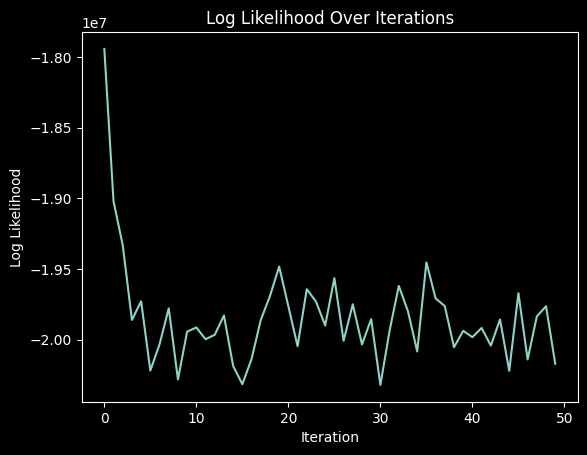

In [357]:
learning_rate = 0.01
C = 0.1
num_steps = 50
approach = 'stochastic'

# Train logistic regression using SGD without regularization
model_no_reg = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization=None, approach=approach)
model_no_reg.fit(X_train_s, y_train.values)
model_no_reg.plot_log_likelihood()

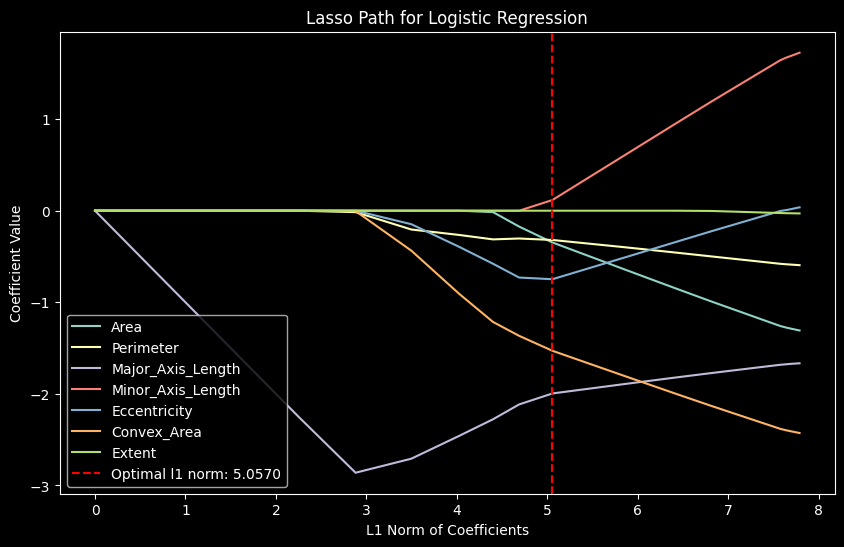

Selected Features using Lasso: Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area'],
      dtype='object')
Best C value: 5.428675439323859


In [358]:
selected_features_lasso, best_C = lasso(X_train_s, y_train.values, X_val_s, y_val.values, features, learning_rate, num_steps, approach)
print('Selected Features using Lasso:', selected_features_lasso)
print('Best C value:', best_C)

In [359]:
model = LogisticRegressionSGD(learning_rate=0.01, C=0.01, num_steps=100, regularization=None, approach='stochastic')
selected_features_stepwise = forward_stepwise_selection(X_train_s, y_train, X_val_s, y_val, features, model)

print("Selected Features using forward_stepwise_selection: ", selected_features_stepwise)

Selected Features using forward_stepwise_selection:  ['Major_Axis_Length', 'Area']


In [360]:
accuracies = {}

# Train logistic regression using SGD without regularization
model_no_reg = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization=None, approach=approach)
model_no_reg.fit(X_train_s, y_train.values)
y_pred_no_reg = model_no_reg.predict(X_test_s) >= 0.5
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)
accuracies["No Regularization Model"] = accuracy_no_reg

# Train logistic regression using SGD with optimal L1 regularization
model_l1 = LogisticRegressionSGD(learning_rate=learning_rate, C=best_C, num_steps=num_steps, regularization='l1', approach=approach)
model_l1.fit(X_train_s, y_train.values)
y_pred_l1 = model_l1.predict(X_test_s) >= 0.5
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracies["L1 Regularization Model"] = accuracy_l1

# Train logistic regression using SGD with L2 regularization
model_l2 = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization='l2', approach=approach)
model_l2.fit(X_train_s, y_train.values)
y_pred_l2 = model_l2.predict(X_test_s) >= 0.5
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
accuracies["L2 Regularization Model"] = accuracy_l2

# Train logistic regression using SGD with optimal stepwise feature selection
X_train_s_stepwise = pd.DataFrame(X_train_s, columns=features)[selected_features_stepwise].values
X_test_s_stepwise = pd.DataFrame(X_test_s, columns=features)[selected_features_stepwise].values
model_stepwise = LogisticRegressionSGD(learning_rate=learning_rate, C=C, num_steps=num_steps, regularization=None, approach=approach)
model_stepwise.fit(X_train_s_stepwise, y_train.values)
y_pred_stepwise = model_stepwise.predict(X_test_s_stepwise) >= 0.5
accuracy_stepwise = accuracy_score(y_test, y_pred_stepwise)
accuracies["Stepwise Selection Model"] = accuracy_stepwise

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=["Model Type", "Accuracy"])
accuracies_df

,Model Type,Accuracy
0,No Regularization Model,0.913386
1,L1 Regularization Model,0.910761
2,L2 Regularization Model,0.913386
3,Stepwise Selection Model,0.905512


## Unregularized Multinomial Logistic Regression

In [35]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [36]:
# one-hot encode the target
y = pd.get_dummies(y, columns=['class'])

# Split the data into train (80%), validation (10%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Standardize the feature
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

In [37]:
y

,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


/home/jaeho/junior_fall/frequentist/project_2/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


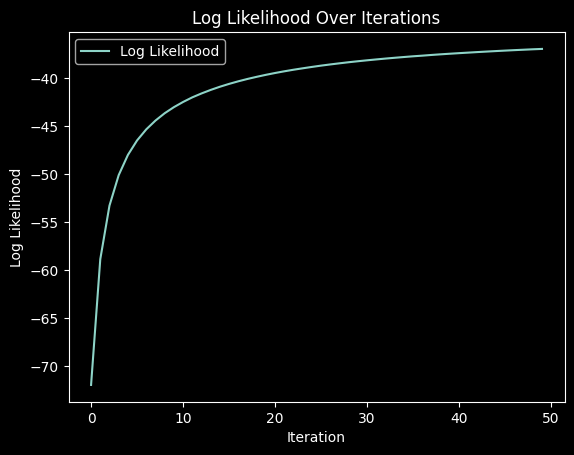

Accuracy: 0.84


In [38]:
from sklearn.metrics import accuracy_score

class MultinomialLogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, num_steps=None, approach='vectorized'):
        self.learning_rate = learning_rate  # Step size for updating weights
        self.num_steps = num_steps
        self.approach = approach  # 'vectorized' or 'stochastic'
        self.weights = None
        self.log_likelihood_values = []

    def softmax(self, z):
        # Compute the softmax for each row of the input matrix z
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def predict_proba(self, X):
        # Compute the class probabilities for input X
        z = np.dot(X, self.weights)
        return self.softmax(z)

    def predict(self, X):
        # Predict the class labels for input X
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

    def compute_log_likelihood(self, X, y):
        # Compute the log likelihood for multinomial logistic regression
        probabilities = self.predict_proba(X)
        log_likelihood = np.sum(y * np.log(probabilities + 1e-9))  # Add 1e-9 to prevent log(0)
        return log_likelihood.sum()  # Sum the log likelihood across all classes to get a single value

    def fit(self, X, y):
        # Initialize weights with zeros (shape: number of features x number of classes)
        num_classes = y.shape[1]
        num_features = X.shape[1]
        self.weights = np.zeros((num_features, num_classes))
        
        for step in range(self.num_steps):
            X, y = shuffle(X, y, random_state=step)
            
            if self.approach == 'vectorized':
                # Vectorized computation for all samples in the dataset
                probabilities = self.predict_proba(X)
                errors = y - probabilities
                gradient = np.dot(X.T, errors) / X.shape[0]
                
                # Update weights using the gradient and learning rate
                self.weights += self.learning_rate * gradient
            elif self.approach == 'stochastic':
                # Stochastic gradient descent: iterate through each sample
                for i in range(X.shape[0]):
                    probabilities = self.predict_proba(X[i].reshape(1, -1))
                    error = y.iloc[i].values - probabilities.flatten()
                    gradient = np.outer(X[i], error)
                    
                    # Update weights using the gradient and learning rate
                    self.weights += self.learning_rate * gradient
            
            log_likelihood = self.compute_log_likelihood(X, y)
            self.log_likelihood_values.append(log_likelihood)

    def plot_log_likelihood(self):
        # Plot the log likelihood values over iterations to visualize convergence
        plt.plot(range(len(self.log_likelihood_values)), self.log_likelihood_values, label='Log Likelihood')
        plt.xlabel('Iteration')
        plt.ylabel('Log Likelihood')
        plt.title('Log Likelihood Over Iterations')
        plt.legend()
        plt.show()

# Example usage
learning_rate = 0.01
num_steps = 50
approach = 'stochastic'

model_multinomial = MultinomialLogisticRegressionSGD(learning_rate=learning_rate, num_steps=num_steps, approach=approach)
model_multinomial.fit(X_train_s, y_train)
model_multinomial.plot_log_likelihood()

# Calculate accuracy using sklearn
y_train_pred = model_multinomial.predict(X_train_s)
y_train_true = np.argmax(y_train.values, axis=1)
accuracy = accuracy_score(y_train_true, y_train_pred)
print(f'Accuracy: {accuracy:.2f}')